# 프로젝트명: XAI(eXplanable AI) 실습 1 (Partial Dependence Plot - PDP)

#### 시각화 vs XAI의 차이

- XAI는 모델이 `왜 이런 결과를 선택했는지 해석`할 수 있게 해주므로, 일반적인 시각화랑은 다릅니다.

#### 🚨 주의사항
- XAI 기법은 모델의 예측값을 설명하기 위한 것이므로, 현상 자체를 설명하는 것이 아닙니다. (물리법칙, 타 도메인 법칙들)
- 원인과 결과를 나타내는 인과추론이 아니라, 상관관계에 가깝기 때문에 인과추론을 위해선 해당 도메인 지식이 반드시 필요합니다.

### 1. 일반적인 모델 결과 해석방법 (XGBoost)

#### 실습 데이터 : 피마 인디언 당뇨병 분류 모델

- [X] Pregnancies: 임신 횟수
- [X] Glucose: 포도당 부하 검사 수치
- [X] BloodPressure: 혈압(mm Hg)
- [X] SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- [X] Insulin: 혈청 인슐린(mu U/ml)
- [X] BMI: 체질량지수(체중(kg)/키(m))^2
- [X] DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- [X] Age: 나이
- [Y] Outcome: 클래스 결정 값(0 또는 1)

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

# 피마 당뇨병 데이터 세트 불러오기
dataset = pd.read_csv('https://blog.kakaocdn.net/dn/cRNQNq/btsHmTFs2EK/SZCyIMQC5M83BJ9cIPJB4K/diabetes.csv?attach=1&knm=tfile.csv')

In [2]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 데이터 세트를 입력 데이터와 레이블로 분리
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 학습 데이터로 모델 학습 시키기
model = XGBClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측하기
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# 정확도 출력하기
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.87%


In [5]:
# 예측할 환자 데이터
patient = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [161],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [28.1],
    'DiabetesPedigreeFunction': [0.527],
    'Age': [20]
})

# 환자 데이터로 예측하기
prediction = model.predict(patient)
print("✅ 당뇨병 양성인지?: %d" % prediction[0], "\n(1이면 당뇨병, 0이면 당뇨병이 아닙니다.)")

# 확률로 예측하기
prediction = model.predict_proba(patient)
print("✅ 당뇨병일 확률: %.2f%%" % (prediction[0][1] * 100.0))
print("❌ 당뇨가 아닐 확률: %.2f%%" % (prediction[0][0] * 100.0))

✅ 당뇨병 양성인지?: 0 
(1이면 당뇨병, 0이면 당뇨병이 아닙니다.)
✅ 당뇨병일 확률: 35.74%
❌ 당뇨가 아닐 확률: 64.26%


#### 3. 의사결정나무 시각화

- ML모델의 파라미터 튜닝은 모델의 정확도를 올릴 수 있지만,
- 모델의 예측이유를 설명할 수 없음

##### 의사결정나무 시각화와 변수 중요도 시각화로 알아볼 예정

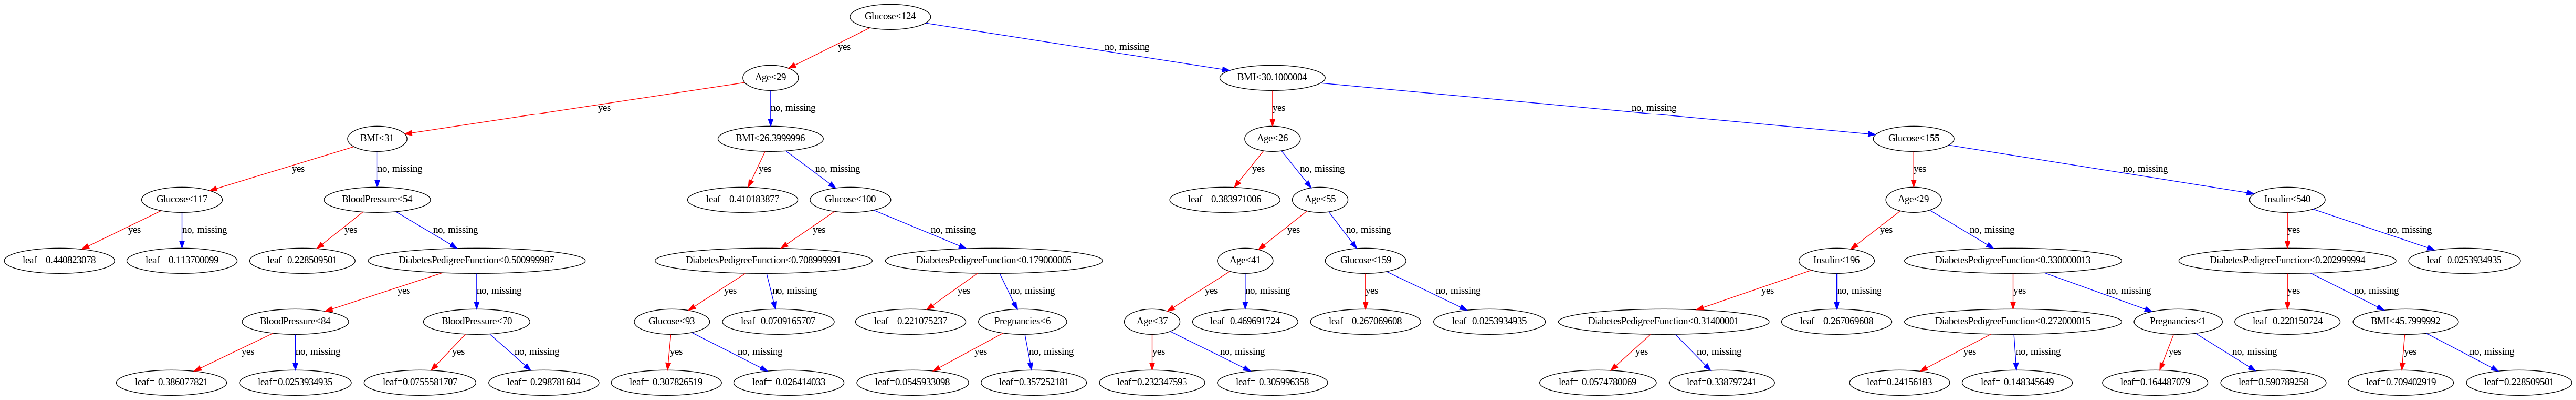

In [6]:
from xgboost import plot_tree
import matplotlib.pyplot as plt ## 차트를 그리기 위한 라이브러리
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리

## 오류 무시
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(model)
plt.show() ## 차트를 보여준다.

- `Glucose 수치가 124 미만` 인지 묻고 있음
- 해당 변수로 환자를 분류했을때, `당뇨병 분류 정보량이 가장 많다`는 것을 간접적으로 시사함.

##### ✅ 해당 모델은 "Glucose 수치"가 1순위로 환자를 진단함.

##### 트리 시각화 해석
1. 앞서 만든 환자의 수치대로 따라가 보면, Glucose(포도당 수치)가 161으로 124보다 크므로, No(오른쪽)으로 간다.
2. BMI가 28.1 이므로 30보다 작아서 Yes로 가고, Age가 20 이므로 26보다 작아서 Yes로 간다
3. leaf 값이 -0.3839 이므로 로지스틱 함수에 대입하면

In [7]:
import numpy as np

def logistic_function(leaf_value):
    return 1 / (1 + np.exp(-leaf_value))

In [8]:
print("로지스틱 함수 50%를 넘으면 1, 아니면 0 =", round(logistic_function(-0.3839), 3)*100, "% 확률로 당뇨병이다.")

로지스틱 함수 50%를 넘으면 1, 아니면 0 = 40.5 % 확률로 당뇨병이다.


#### 가지치기(max_depth)에 따라 모델별 특정 변수의 우선순위 비교

In [9]:
depth_2_model = XGBClassifier(max_depth=2)
depth_2_model.fit(X_train, y_train)

depth_4_model = XGBClassifier(max_depth=4)
depth_4_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
plot_tree(depth_2_model)
plt.show() ## 차트를 보여준다.

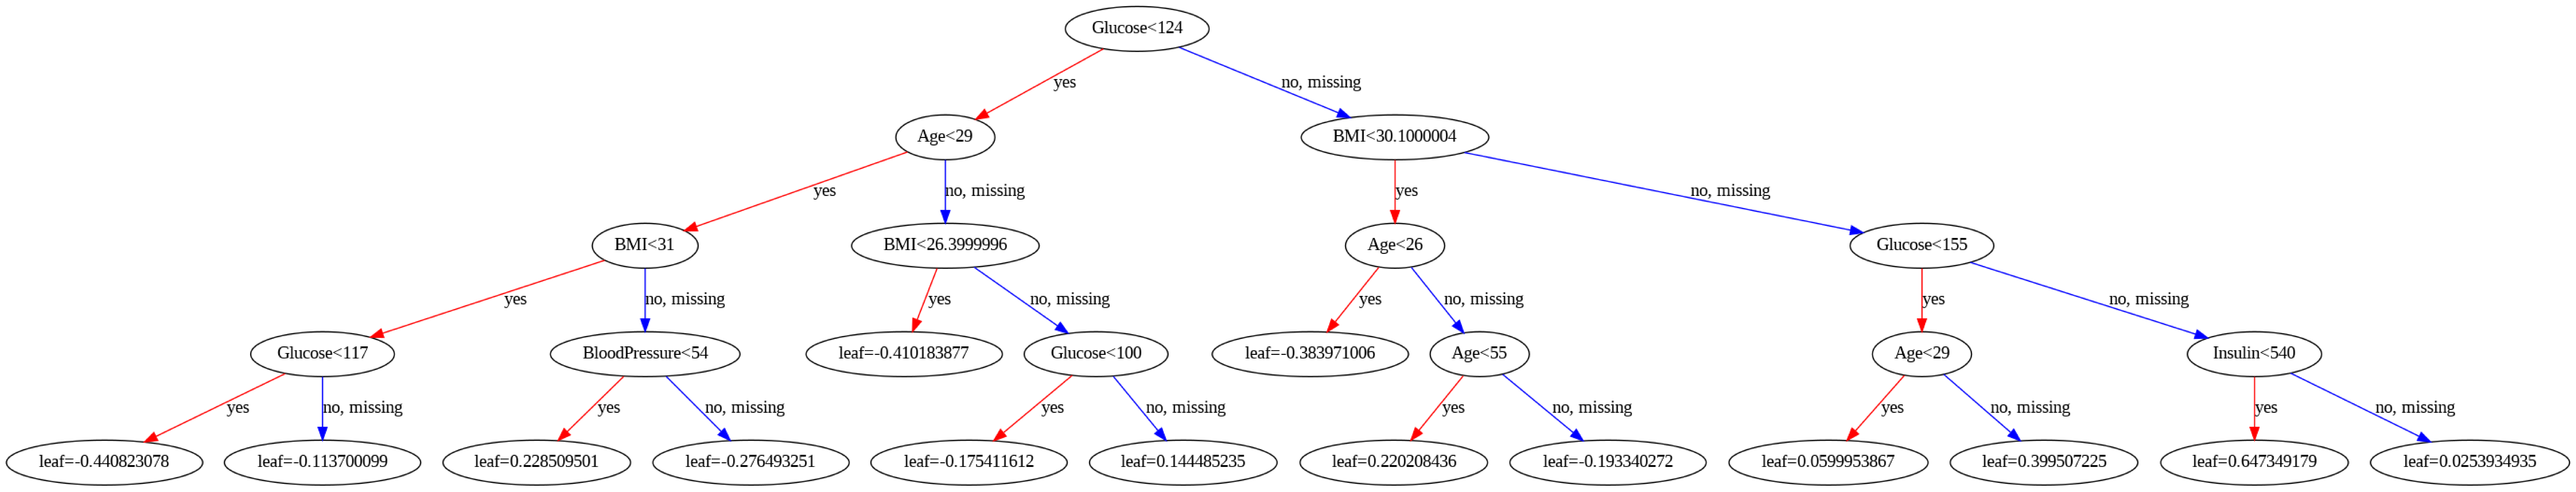

In [11]:
plot_tree(depth_4_model)
plt.show() ## 차트를 보여준다.

#### 4. 피처 중요도 시각화

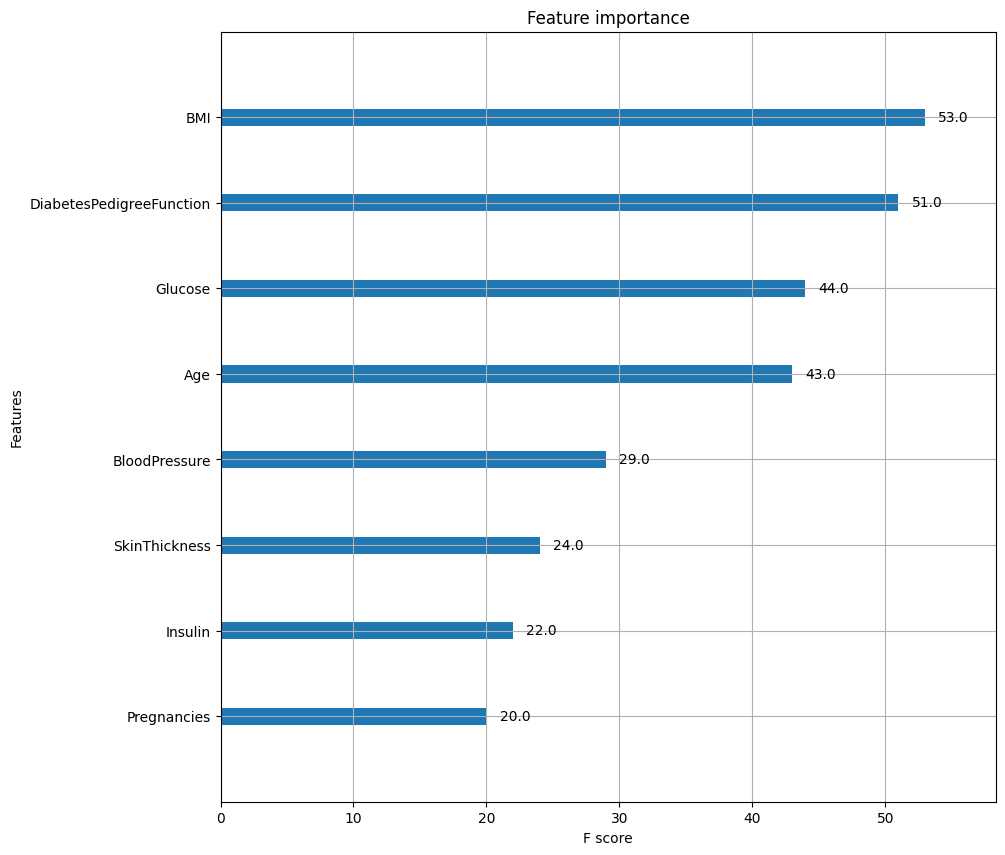

In [12]:
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(depth_2_model)
plt.show() ## 차트를 보여준다.

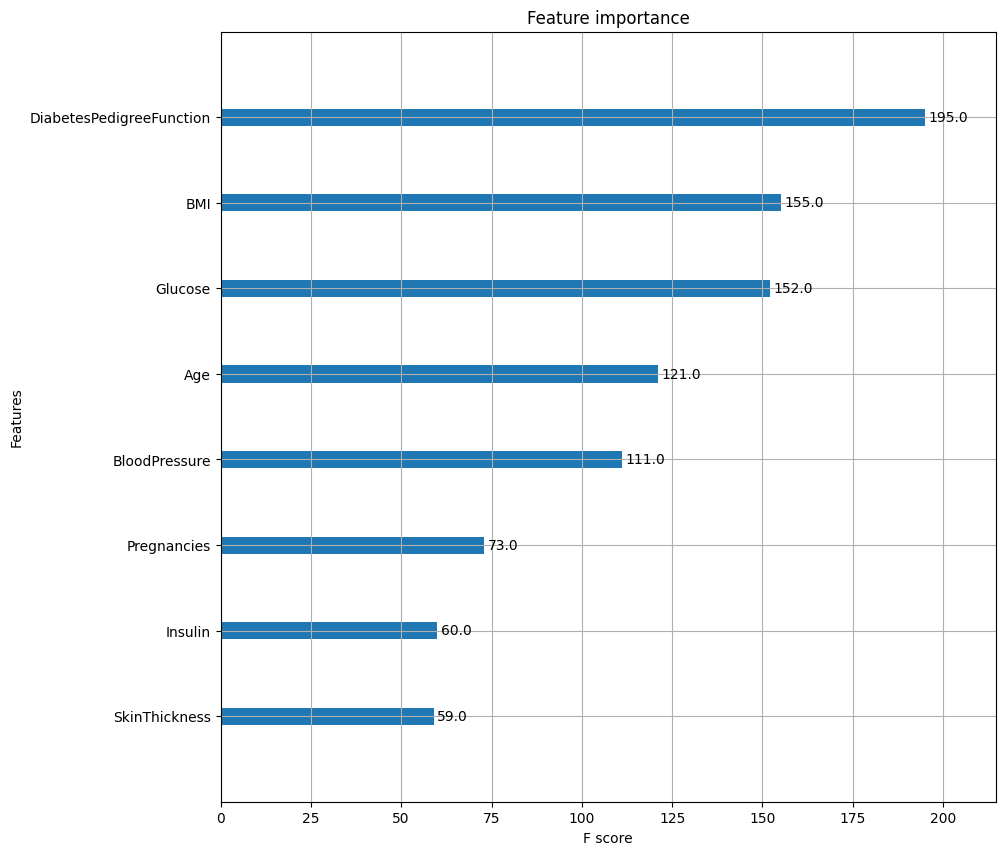

In [13]:
plot_importance(depth_4_model)
plt.show() ## 차트를 보여준다.

- 트리 깊이에 따라 모델의 의사결정방식과 정확도도 달라지기에 변수 중요도는 변하게 됩니다.

##### 당뇨병을 진단하는 우선순위는 `변수 중요도의 순위` 라고 `할 수 없고`, 당뇨병 `진단에 영향을 미치는 정도를 구분한다`는 해석은 가능합니다.

#### 모델의 의사결정방법을 확인하기엔 ✅ `의사결정트리 시각화로 판단`하는게 좋습니다.

#### 🚨피처 중요도의 한계
> 피처 중요도는 해당 변수가 모델 판단에 긍정/부정인지 알 수가 없습니다.

--------------------------------------------
# ⭐️ 부분 의존성 플롯(Partial Dependence Plot - PDP)

### PDP 란?
> 변수의 수치 변화에 따라 모델에 기여하는 정도(+인지, -인지) 가 어떻게 달라지는 확인하는 기법
-
> 관심있는 변수 1개를 제외하고 나머지 변수들을 고정시킨 후 관심있는 변수를 변화시키면서 Y값의 변화를 평균낸 수치

1. 해당 변수가 모델에 끼치는 긍정/부정을 알수 있음
2. 특정 변수에 대해 Buffer를 함께 표시함으로, 피처 간 독립을 보장하지 못하는 환경에서, 어느정도 모델에 오차가 있을 수 있는지 확인해줌
3. 변수가 모델 예측에 미치는 독립적인 영향력 뿐만 아니라, 피처 간 연관관계가 있을때도 활용 가능함

## 1. PDP 실습

##### 📌 TargetPlot : 모델 없이 순수하게 데이터로만 독립변수와 종속변수 간 관계를 나타냄

In [17]:
from pdpbox import info_plots

pima_feature = X_train.columns
pima_target = 'Outcome'

target_plot = info_plots.TargetPlot(
    df=dataset,
    feature='Glucose',
    feature_name='Glucose',
    target='Outcome',
)

ModuleNotFoundError: No module named 'pdpbox'

In [16]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

NameError: name 'target_plot' is not defined

- X축은 Glucose 수치이며, 왼쪽 Y축은 구간별 데이터 개수임
- 오른쪽 Y축은 당뇨병 진단 여부 (>50%)임
- 막대그래프는 왼쪽 Y축에 대응하고, 꺾은선그래프는 오른쪽 Y축에 대응함

#### 해석방법

> Glucose 수치가 84인 경우, 첫번째 막대그래프이므로 당뇨병에 걸릴확률은 7.3% 임을 의미하며, 수치가 181이면 당뇨일 확률이 82.6%임을 의미함

### 변수를 혈압으로 변경

##### 📌 TargetPlot : 모델 없이 순수하게 데이터로만 독립변수와 종속변수 간 관계를 나타냄

In [ ]:
target_plot2 = info_plots.TargetPlot(
    df=dataset,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target='Outcome',
)

fig2, axes2, summary_df2 = target_plot2.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

> 혈압의 경우, 고혈압(80-120)에서는 당뇨병에 걸릴 확률이 46%이고, 나머지 정상혈압도 약 30%이므로 혈압 만으로는 당뇨를 진단하는 것은 힘들다는 것을 의미합니다.

- summary_df는 각 수치를 dataframe으로 담고 있음

##### 📌 PredictPlot : 학습모델과 데이터의 두 결과 비교하기

In [18]:
## PredictPlot
target_plot3 = info_plots.PredictPlot(
    model=depth_2_model,
    df=dataset,
    model_features=pima_feature,
    feature='Glucose',
    feature_name='Glucose',
    predict_kwds={},
)

fig3, axes3, summary_df3 = target_plot3.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)


NameError: name 'info_plots' is not defined

#### 해석방법

> 상단의 그래프는 예측분포(pred dist)와 하단의 그래프는 누적 count 로 나뉩니다.
-
> Glucose의 0-87 구간인 환자가 당뇨병일 확률은 5.4%임을 의미하며, Glucose의 0-87 구간 `BoxPlot의 최대치가 0.3`을 넘지 않으므로, `해당 구간에서 당뇨가 있을 것이라는 추정치는 최대 30%를 넘지 않게 학습`될 것임을 의미합니다.
#### 즉, 데이터 분포와 학습모델을 기준으로, `특정 구간의 변수가 당뇨병 진단에 얼마나 영향력을 행사하는지 시각화`를 함

### ✅ 인사이트 발견!
- Glucose의 0-87 구간의 Glucose가 당뇨진단에는 `음의 상관관계`를 가지게 될 것이다.
- Glucose의 164~199 구간의 Glucose가 당뇨진단에는 `양의 상관관계`를 가지게 될 것이다.

##### 📌 PDPIsolate : 특정 변수에 대해 모델 부분 의존성 플롯을 그리기

In [19]:
from pdpbox import pdp

pdp_glucose = pdp.PDPIsolate(
    model=depth_2_model,
    df=dataset,
    model_features=pima_feature,
    feature='Glucose',
    feature_name='Glucose!!',
)

fig4, axes4 = pdp_glucose.plot(
    plot_lines=True, ## True로 설정하면 선을 그린다. False로 설정하면 선을 그리지 않는다.
    plot_pts_dist=True,
    frac_to_plot=0.5,
    figsize=(12, 6),
    engine='matplotlib',
)

ModuleNotFoundError: No module named 'pdpbox'

- Glocose가 150~175 부분에서 급격하게 올라가는 부분을 볼 수 있다.

##### 📌 InteractTargetPlot : 두 변수(혈압, 포도당 수치)와 종속변수 간 관계 시각화 (모델X, 순수하게 데이터만)

In [ ]:
target_glucose_blood = info_plots.InteractTargetPlot(
    df=dataset,
    features=['BloodPressure', 'Glucose'],
    feature_names=['BP', 'Glu'],
    target='Outcome',
)

fig6, axes6, summary_df6 = target_glucose_blood.plot(
    figsize=(15, 10),
    engine='matplotlib',
)

#### 해석방법

> - 원의 크기 : 학습데이터
> - 원의 크기가 작을수록 사례가 적고, 원이 커질수록 사례가 많음을 의미함.
> - 원의 색깔 : 당뇨병 진단 확률 (진할 수록 높다)

### ✅ 인사이트 발견!
- 두 변수의 값이 높아질 수록 당뇨병 진단을 받을 가능성이 높아진다.

In [ ]:
pdp_glucose_blood = pdp.PDPInteract(
    model=depth_2_model,
    df=dataset,
    model_features=pima_feature,
    features=['BloodPressure', 'Glucose'],
    feature_names=['BP', 'Glu'],
)

fig7, axes7 = pdp_glucose_blood.plot(
    plot_type='grid',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    engine='matplotlib',
)

- 혈압이 0인 구간에선 당뇨병 진단받을 확률이 46.6%임을 의미합니다.
- 포도당 수치가 0인 구간에선 당뇨병 진단을 받을 확률이 14.3% 임을 의미합니다.
> 단, 0인 구간은 이상치이므로 실제로 적용하거나 해석할땐, 0인 부분은 제외합니다.

In [20]:
## 변수별 PDP 안 보이기
fig8, axes8 = pdp_glucose_blood.plot(
    plot_type='grid',
    plot_pdp=False,
    to_bins=False,
    show_percentile=True,
    engine='matplotlib',
)

NameError: name 'pdp_glucose_blood' is not defined

##### 📌 PDPInteract : 모델에 대한 부분 의존성 플롯

- pip uninstall matplotlib  
- pip install matplotlib==3.7.1

#### 해석방법

> - 혈압이 낮고, Glu가 200에 가까우면 88%로 당뇨병 임을 의미함.
> - 혈압에 대한 목표 플롯에선, 혈압이 증가하면 당뇨병도 우상향으로 보였는데, 이번 차트에선 음의 방향으로 된다.
> - 이는, TargetPlot에선 혈압이 높을 수록 당뇨병 진단 확률이 올라가지만,

그림 참고
![](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/941e6ab5-cc85-48c5-9b3f-00dda712f21d/Untitled.png?id=583ba151-866b-421e-bb04-52074e73ca24&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1715508000000&signature=tziCnaDyDdZuUBlxDbHpjt1g2JqZ4TY7MggZCWpQ8Sk&downloadName=Untitled.png)

### ✅ 인사이트 발견!
- 모든 변수가 조합된 모델에서는 높은 혈압에 해당하는 구간에도 당뇨병 진단 가능성을 낮추고 있습니다.
> => 혈압에 대한 PDP가 말해주고 있음



![혈압_PDP](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/8be4e96f-b00e-47a4-a63a-8bfba12812be/Untitled.png?id=34504346-3aa6-4545-967d-5775a1b881f5&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1715508000000&signature=CDQkRHDGl3dmX8E4pKhF78wCvgmWlklS9KGyu1Q45Xs&downloadName=Untitled.png)

##### 📌 PDPIsolate : 혈압 변수에 대해 모델 부분 의존성 플롯을 그리기

In [ ]:
pdp_glucose = pdp.PDPIsolate(
    model=depth_2_model,
    df=dataset,
    model_features=pima_feature,
    feature='BloodPressure',
    feature_name='BP',
)
### 세부적인 버전
fig9, axes9 = pdp_glucose.plot(
    plot_lines=False,
    plot_pts_dist=False,
    frac_to_plot=0.5,
    figsize=(12, 6),
    engine='matplotlib',
)

- 혈압과 당뇨진단의 관계는 '모델X_목표플롯=양의 상관관계', '모델O_의존성플롯=음의 상관관계'로 나타났습니다.
- 전체 변수를 대입한 모델의 의존성플롯으로 `혈압보다는 포도당 지수`가 더 중요하다는 결과를 알 수 있습니다.

# PDP의 사용법

### 장점.

1. PDP는 변수들간 전반적인 관계를 이해하는데 사용됨
2. 직관적이고 구현이 쉽다.
3. 변수들간 상관관계가 없을때, 가장 효과적이다.

### 단점.

1. 최대 2개 변수까지만 시각화가 용이함.
2. 데이터가 적은 구간에선 신뢰성이 떨어짐.
3. 변수들간의 상호작용을 고려하지 않으므로, 상호작용이 존재하는 데이터엔 사용하기 어려움